### Supriya Kumari - Btech (CSE)

# ASK N BID ASSIGNMENT

## Train a ML/DL model to predict stock prices for the next day.

In [92]:
# Importing packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [93]:
#store the data into a dataFrame
df=pd.read_csv('prices-split-adjusted.csv')
df.head(6)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0


In [94]:
# Get the number of trading days
df.shape


(851264, 7)

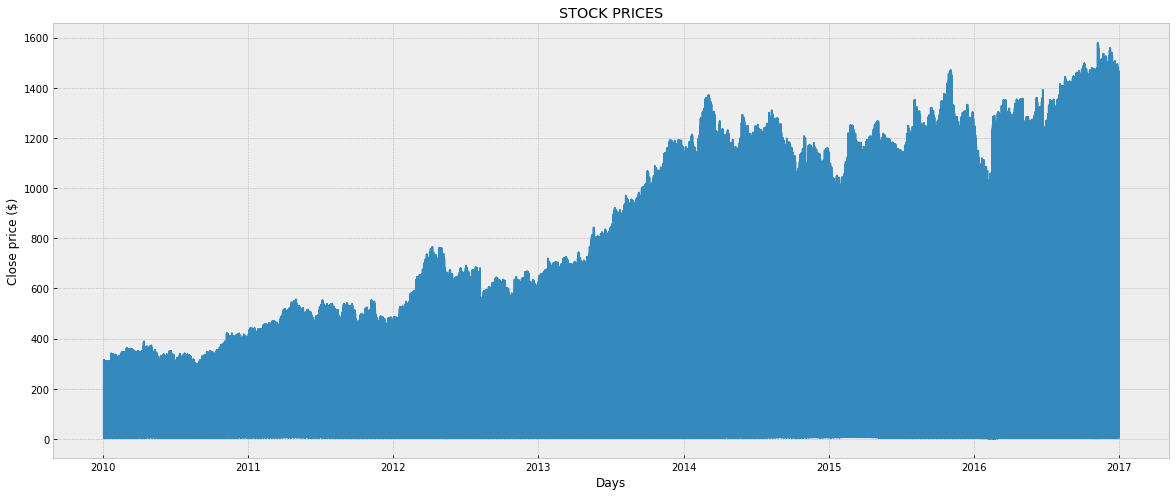

In [95]:
#setting index as date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

#Visulize the "close" data
plt.figure(figsize=(20,8))
plt.title('STOCK PRICES')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(df['close'], label='Close Price')
plt.show()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 48.7+ MB


In [97]:
#Get the close price
df=df[['close']]
df.head()

,close
date,
2016-01-05,125.839996
2016-01-06,119.980003
2016-01-07,114.949997
2016-01-08,116.620003
2016-01-11,114.970001


In [105]:
#creatte a variable to predict 'x' days out into the future
future_days=851238

#Create a new column (target) shifted 'x' units/days up
df['Prediction']=df[['close']].shift(-future_days)
print(df.tail(10))

                 close  Prediction
date                              
2016-12-30   57.730000         NaN
2016-12-30    8.730000         NaN
2016-12-30   49.520000         NaN
2016-12-30   38.669998         NaN
2016-12-30   63.330002         NaN
2016-12-30  103.199997         NaN
2016-12-30   43.040001         NaN
2016-12-30   53.529999         NaN
2016-12-30   45.450001         NaN
2016-12-30   53.630001         NaN


In [106]:
#create the feature daya set(x) and convert to a numpy array and remove the last'x' rows/days
x=np.array(df.drop(['Prediction'], 1))
#Remove the last 'n' rows
x=x[:-future_days]
print(x)

[[125.839996]
 [119.980003]
 [114.949997]
 [116.620003]
 [114.970001]
 [115.550003]
 [112.849998]
 [114.379997]
 [112.529999]
 [110.379997]
 [109.300003]
 [110.      ]
 [111.949997]
 [110.120003]
 [111.      ]
 [110.709999]
 [112.580002]
 [114.470001]
 [114.5     ]
 [110.559998]
 [114.050003]
 [115.709999]
 [114.019997]
 [111.160004]
 [110.650002]
 [107.519997]]


In [101]:
#dependent dataset.
#create the target dataset (y) and convert to numpy array and get all targer values except x .
y=np.array(df['Prediction'])
#Get all of the y Values except the last 'n'.
y=y[:-future_days]
print(y)

[ 55.110001  30.76     181.770004  70.910004  31.139999  69.120003
  50.77      21.719999  30.09      76.370003  86.510002 135.899994
  40.700001  37.259998  60.369999  90.260002  57.73       8.73
  49.52      38.669998  63.330002 103.199997  43.040001  53.529999
  45.450001  53.630001]


In [107]:
#Split the data into 52% training and 48% testing
x_train, x_test, y_test, y_train=train_test_split(x, y, test_size=0.48)

In [108]:
# create the models
#create the decision tree regressor model
tree=DecisionTreeRegressor().fit(x_train, y_train)

#create the linear regression model
lr= LinearRegression().fit(x_train, y_train)



In [109]:
#Testing Model: Score Returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
tree_confidence=tree.score(x_test, y_test)
print("tree confidence: ", tree_confidence)


tree confidence:  -1.7930347405137597


In [110]:
#Testing Model: Score Returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
lr_confidence=lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  -1.055663065850799


In [111]:
#Get the last "x" rows of the features data set
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[125.839996],
       [119.980003],
       [114.949997],
       [116.620003],
       [114.970001],
       [115.550003],
       [112.849998],
       [114.379997],
       [112.529999],
       [110.379997],
       [109.300003],
       [110.      ],
       [111.949997],
       [110.120003],
       [111.      ],
       [110.709999],
       [112.580002],
       [114.470001],
       [114.5     ],
       [110.559998],
       [114.050003],
       [115.709999],
       [114.019997],
       [111.160004],
       [110.650002],
       [107.519997]])

In [112]:
#Show the model tree prediction
tree_prediction=tree.predict(x_future)
print("Tree Prediction: ", tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction=lr.predict(x_future)
print("linear Prediction: ", lr_prediction)

Tree Prediction:  [181.770004 181.770004  49.52      38.669998  49.52      50.77
  53.630001   8.73      57.73      69.120003  40.700001  69.120003
  57.73      69.120003  30.09     135.899994  57.73       8.73
   8.73      37.259998  55.110001  50.77      53.630001  57.73
  37.259998  40.700001]

linear Prediction:  [130.8253434   98.76490815  71.24539035  80.38211103  71.35483364
  74.52806552  59.75614762  68.12688012  58.00541051  46.24259783
  40.33387444  44.16360743  54.83217863  44.82015231  49.634678
  48.04806206  58.27898045  68.61929836  68.783425    47.22739601
  66.32145966  75.40341492  66.15729472  50.51007118  47.71981424
  30.595336  ]


In [144]:
#Visualize the data
predictions=tree_prediction

valid=df[(x.shape[-1]):]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['close'])
plt.plot(valid['close','Predictions'])
plt.legend(['Orig','Val','Pred'])
plt.show()

ValueError: Length of values does not match length of index

<ipython-input-147-81bc0b2089f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


KeyError: ('close', 'Predictions')

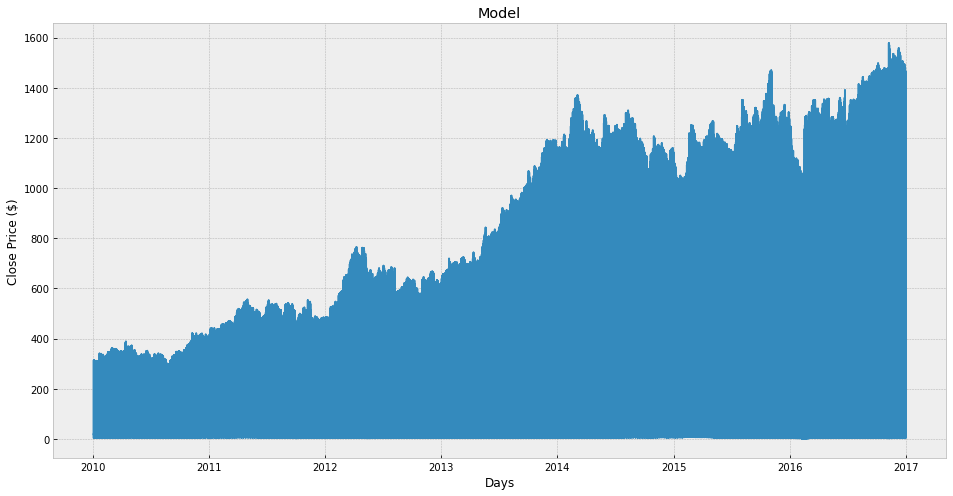

In [147]:
predictions=lr_prediction

valid=df[:x.shape[0]]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['close'])
plt.plot(valid['close', 'Predictions'])
plt.plot(grid=True)
plt.legend(['Orig','Val','Pred'])
plt.show()